<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/20210204_AutoEncoder_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret tpot

     |████████████████████████████████| 256kB 6.1MB/s 
     |████████████████████████████████| 92kB 5.4MB/s 
     |████████████████████████████████| 102kB 4.8MB/s 
     |████████████████████████████████| 276kB 9.9MB/s 
     |████████████████████████████████| 174kB 11.0MB/s 
     |████████████████████████████████| 245kB 15.8MB/s 
     |████████████████████████████████| 65.8MB 69kB/s 
     |████████████████████████████████| 14.2MB 55.1MB/s 
     |████████████████████████████████| 1.8MB 50.9MB/s 
     |████████████████████████████████| 6.8MB 39.5MB/s 
     |████████████████████████████████| 1.6MB 47.2MB/s 
     |████████████████████████████████| 157.5MB 82kB/s 
     |████████████████████████████████| 163kB 48.1MB/s 
     |████████████████████████████████| 2.1MB 28.2MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 604kB 49.3MB/s 
     |████████████████████████████████| 3.1MB 32.8MB/s 
 

In [3]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from pycaret.datasets import get_data
from tpot import TPOTClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from pycaret.classification import *
from sklearn.metrics import classification_report, accuracy_score,f1_score 
from sklearn.metrics import precision_score, recall_score,confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
print(os.listdir('/content/drive/MyDrive/Classification/'))

['creditcard.csv', 'v_data', 'Videos', 'mo_data', '.ipynb_checkpoints', 'heart_failure_clinical_records_dataset.csv', 'diabetes.csv', 'dia.csv']


In [4]:
# train autoencoder for regression with no compression in the bottleneck layer
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
# getting data 
data=pd.read_csv('/content/drive/MyDrive/Classification/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
print('X: Features || y:Class Labels: \n')
print(X.shape,y.shape) 
# Converting to arrays   
X = X.values 
y = y.values 
# Split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42) 
print('After Splitting : \n')
X_train.shape,X_test.shape,y_train.shape,y_test.shape

X: Features || y:Class Labels: 

(284807, 30) (284807,)
After Splitting : 



((227845, 30), (56962, 30), (227845,), (56962,))

Epoch 1/400
14241/14241 - 22s - loss: 0.0031 - val_loss: 0.0059
Epoch 2/400
14241/14241 - 21s - loss: 4.3415e-04 - val_loss: 5.3360e-04
Epoch 3/400
14241/14241 - 20s - loss: 3.8520e-04 - val_loss: 0.0021
Epoch 4/400
14241/14241 - 20s - loss: 3.4595e-04 - val_loss: 9.6185e-04
Epoch 5/400
14241/14241 - 20s - loss: 3.2473e-04 - val_loss: 9.7071e-04
Epoch 6/400
14241/14241 - 20s - loss: 3.1126e-04 - val_loss: 0.0012
Epoch 7/400
14241/14241 - 21s - loss: 2.9721e-04 - val_loss: 0.0091
Epoch 8/400
14241/14241 - 20s - loss: 2.8599e-04 - val_loss: 2.8788e-04
Epoch 9/400
14241/14241 - 26s - loss: 2.6607e-04 - val_loss: 0.0014
Epoch 10/400
14241/14241 - 22s - loss: 2.5183e-04 - val_loss: 0.0022
Epoch 11/400
14241/14241 - 20s - loss: 2.4048e-04 - val_loss: 0.0036
Epoch 12/400
14241/14241 - 20s - loss: 2.3137e-04 - val_loss: 0.0033
Epoch 13/400
14241/14241 - 20s - loss: 2.2241e-04 - val_loss: 0.0017
Epoch 14/400
14241/14241 - 20s - loss: 2.1398e-04 - val_loss: 4.0665e-04
Epoch 15/400
14241/14241 - 

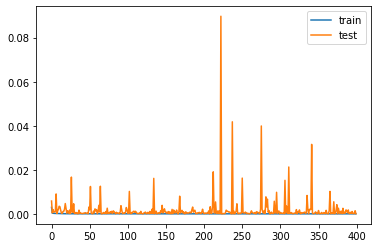

In [5]:
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

Epoch 1/100
7121/7121 - 15s - loss: 0.0048 - val_loss: 4.4310e-04
Epoch 2/100
7121/7121 - 13s - loss: 4.7387e-04 - val_loss: 0.0013
Epoch 3/100
7121/7121 - 14s - loss: 3.7657e-04 - val_loss: 9.8335e-04
Epoch 4/100
7121/7121 - 14s - loss: 3.3527e-04 - val_loss: 8.9061e-04
Epoch 5/100
7121/7121 - 15s - loss: 3.1734e-04 - val_loss: 5.5858e-04
Epoch 6/100
7121/7121 - 16s - loss: 3.0275e-04 - val_loss: 5.0908e-04
Epoch 7/100
7121/7121 - 16s - loss: 2.9116e-04 - val_loss: 7.4979e-04
Epoch 8/100
7121/7121 - 15s - loss: 2.8269e-04 - val_loss: 9.3111e-04
Epoch 9/100
7121/7121 - 15s - loss: 2.7553e-04 - val_loss: 6.1881e-04
Epoch 10/100
7121/7121 - 15s - loss: 2.6967e-04 - val_loss: 7.6734e-04
Epoch 11/100
7121/7121 - 14s - loss: 2.6072e-04 - val_loss: 8.7757e-04
Epoch 12/100
7121/7121 - 14s - loss: 2.5238e-04 - val_loss: 4.5005e-04
Epoch 13/100
7121/7121 - 14s - loss: 2.4875e-04 - val_loss: 3.1694e-04
Epoch 14/100
7121/7121 - 14s - loss: 2.4207e-04 - val_loss: 7.0241e-04
Epoch 15/100
7121/7121 

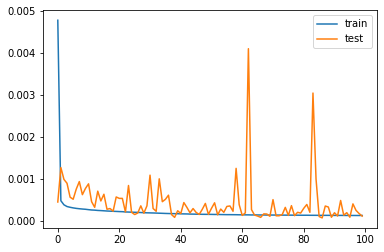

In [6]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
# getting data 
data=pd.read_csv('/content/drive/MyDrive/Classification/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
#Auto-Encoder
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
#e = Dense(n_inputs)(e)
#e = BatchNormalization()(e)
#e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [19]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
#getting data 
data=pd.read_csv('/content/drive/MyDrive/Classification/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)



0.9991573329588147


ValueError: ignored

In [14]:
#DEFINE A HELPER FUNCTION TO SHOW EVALUATION METRICS 
def evaluate(y_test,preds):
    print('****EVALUATIONS METRICS****')
    accuracy = round(accuracy_score(y_test, preds),2)
    print("Accuracy == {}".format(accuracy)) 
    #precision
    precision = round(precision_score(y_test, preds),2)
    print("Precision == {}".format(precision)) 
    #recall
    recall = round(recall_score(y_test, preds),2)
    print("Recall == {}".format(recall)) 
    #F1 score
    f1 = round(f1_score(y_test, yhat),2)
    print("F1-Score == {}".format(f1)) 

# Show results on Random Forest Classifier 
evaluate(y_test,yhat) 

****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.84
Recall == 0.55
F1-Score == 0.67


****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.84
Recall == 0.55


NameError: ignored

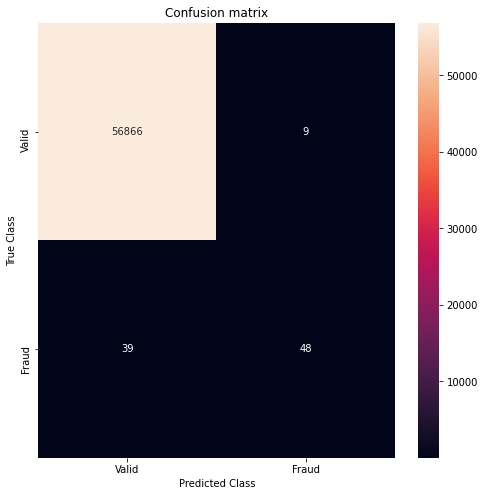

In [15]:
# printing the confusion matrix 
conf_matrix = confusion_matrix(y_test, yhat) 
plt.figure(figsize =(8, 8)) 
sb.heatmap(conf_matrix, xticklabels =['Valid', 'Fraud'], 
           yticklabels = ['Valid', 'Fraud'], annot = True, fmt ="d")
plt.title("Confusion matrix") 
plt.ylabel('True Class') 
plt.xlabel('Predicted Class') 
plt.show() 

In [20]:
#let's shuffle the dataset before getting into undersampling 
data=data.sample(frac=1)
#separate fraud and non fraud transactions 
fraud=data[data.Class==1]
nonfraud=data[data.Class==0][:500]
# create a balanced datafrme of fraud and non fraud transactions and worn on it 
balanced_df = pd.concat([fraud, nonfraud])
# Shuffle dataframe rows
balanced_df= balanced_df.sample(frac=1, random_state=101)
#show 
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,-7.454841,7.388055,-10.475229,-0.379315,-11.736729,-2.086989,-2.442354,-3.535524,0.130360,-2.071450,0.576656,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1.00,1
9861,14532.0,1.183594,-0.082875,0.736538,0.081360,-0.401886,0.148805,-0.601341,0.084268,1.446284,-0.404412,2.324723,-1.527121,2.069047,1.615536,0.119014,0.470962,0.184618,0.268117,-0.351163,-0.070431,-0.004884,0.262987,-0.042969,-0.282364,0.158542,1.062763,-0.075016,-0.010410,15.95,0
24185,33106.0,-0.484275,-0.061692,1.073505,-2.025112,0.302511,-0.174966,0.451924,-0.085669,-1.246568,0.610028,-0.090807,-0.577508,-0.484727,0.046285,-0.269584,-0.636327,-1.000255,1.748315,-0.458264,-0.177287,-0.589349,-1.189862,-0.034892,-0.871931,-0.360283,0.683183,0.087477,-0.060562,36.94,0
220265,142094.0,0.340234,1.152763,-1.175821,0.100135,-0.300351,-0.229592,-1.852650,-5.557464,-0.240797,-1.291457,-0.857302,0.807808,-0.180211,1.246466,0.525811,0.140648,-0.266283,0.044085,-0.642384,1.092370,-2.258351,1.656770,0.200159,0.057004,0.608551,-0.076586,-0.036854,0.130159,1.00,0
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,-1.531608,-1.394328,-0.220719,-1.530990,1.075248,0.388383,-0.660655,0.093321,0.335742,0.057551,3.973217,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1


In [21]:
print("Before Undersampling :\n",data.Class.value_counts())
print('________-----________')
print("After Undersampling :\n",balanced_df.Class.value_counts())

Before Undersampling :
 0    284315
1       492
Name: Class, dtype: int64
________-----________
After Undersampling :
 0    500
1    492
Name: Class, dtype: int64


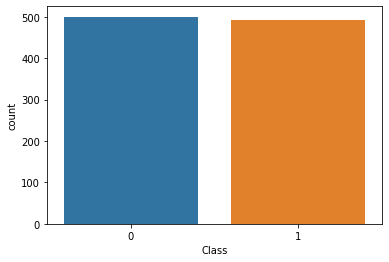

In [22]:
sb.countplot(data=balanced_df,x='Class')

In [23]:
balanced_df.shape

(992, 31)

In [24]:
df=balanced_df.copy()
# dividing the X  and the Y  from the balanced dataset 
X_balanced = df.drop(['Class'], axis = 1) 
y_balanced = df["Class"] 
print('X_balanced: Features || y_balanced:Class Labels: \n')
print(X_balanced.shape,y_balanced.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
X_balanced = X_balanced.values 
y_balanced = y_balanced.values 
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( X_balanced,y_balanced , test_size = 0.2, random_state = 101) 
print('\n')
print('After Splitting : \n')
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

X_balanced: Features || y_balanced:Class Labels: 

(992, 30) (992,)


After Splitting : 

(793, 30) (199, 30) (793,) (199,)


In [25]:
# Random Forest Classifier (RANDOM FOREST) 
rfc = RandomForestClassifier()
# Decison Tree Classifier 
dt=DecisionTreeClassifier()
# Logistic Regression Classifier
lr=LogisticRegression()
#put those alorithms into a dictionnary 
models={'Random Forest Classifier': rfc,'Decision Tree':dt,'Logistic Regression':lr}
predictions={}
for name,model in models.items():
    print('***********')
    print(f'TRAINING {name} Model ')
    model.fit(X_train,y_train)
    print('FINISHED TRAINING \n')
    print(f'TRAIN SCORE : {model.score(X_train,y_train)}\n')
    print(f'TEST SCORE : {model.score(X_test,y_test)}\n')
    predictions[name] = model.predict(X_test) 
    print(f'DONE WITH {name} MODEL')

***********
TRAINING Random Forest Classifier Model 
FINISHED TRAINING 

TRAIN SCORE : 1.0

TEST SCORE : 0.964824120603015

DONE WITH Random Forest Classifier MODEL
***********
TRAINING Decision Tree Model 
FINISHED TRAINING 

TRAIN SCORE : 1.0

TEST SCORE : 0.9095477386934674

DONE WITH Decision Tree MODEL
***********
TRAINING Logistic Regression Model 
FINISHED TRAINING 

TRAIN SCORE : 0.9394703656998739

TEST SCORE : 0.9698492462311558

DONE WITH Logistic Regression MODEL


In [27]:
# Setup the dataset and preprocess 
pycaret_clf=setup(data=balanced_df,target='Class',train_size=0.8)

,Description,Value
0,session_id,4604
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(992, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [28]:
#let's compare models  
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9483,0.9833,0.9349,0.9633,0.9479,0.8967,0.8988,0.295
xgboost,Extreme Gradient Boosting,0.9471,0.9793,0.9298,0.9646,0.9462,0.8942,0.8961,1.339
catboost,CatBoost Classifier,0.9459,0.9844,0.9149,0.9762,0.9438,0.8918,0.8947,9.314
gbc,Gradient Boosting Classifier,0.9395,0.9797,0.9198,0.9597,0.9384,0.8791,0.8815,0.529
et,Extra Trees Classifier,0.9370,0.9824,0.8948,0.9786,0.9339,0.8741,0.8787,0.465
lr,Logistic Regression,0.9357,0.9741,0.9074,0.9638,0.9336,0.8715,0.8748,0.498
rf,Random Forest Classifier,0.9332,0.9792,0.9048,0.9617,0.9312,0.8665,0.8700,0.560
ada,Ada Boost Classifier,0.9332,0.9748,0.9148,0.9519,0.9322,0.8665,0.8685,0.197
qda,Quadratic Discriminant Analysis,0.9180,0.9635,0.8894,0.9443,0.9157,0.8360,0.8379,0.025
ridge,Ridge Classifier,0.9142,0.0000,0.8367,0.9909,0.9067,0.8285,0.8394,0.023


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4604, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
# Create the XGBoost Classifier for prediction 
xgboost=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9375,0.9581,0.9000,0.9730,0.9351,0.8750,0.8775
1,0.9500,0.9981,0.9750,0.9286,0.9512,0.9000,0.9011
2,0.9250,0.9725,0.9500,0.9048,0.9268,0.8500,0.8511
3,0.9367,0.9942,0.9744,0.9048,0.9383,0.8735,0.8760
4,0.9873,1.0000,0.9744,1.0000,0.9870,0.9747,0.9750
5,0.9367,0.9821,0.9250,0.9487,0.9367,0.8734,0.8737
6,0.9494,0.9808,0.9000,1.0000,0.9474,0.8988,0.9035
7,0.9747,0.9859,0.9500,1.0000,0.9744,0.9494,0.9506
8,0.9367,0.9897,0.9000,0.9730,0.9351,0.8735,0.8760
9,0.9494,0.9718,0.9000,1.0000,0.9474,0.8988,0.9035


In [43]:
tuned_xgboost=tune_model(xgboost,n_iter=200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9644,0.9250,0.9737,0.9487,0.9000,0.9011
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9125,0.9806,0.9250,0.9024,0.9136,0.8250,0.8253
3,0.9620,0.9968,0.9744,0.9500,0.9620,0.9241,0.9244
4,0.9747,0.9994,0.9487,1.0000,0.9737,0.9493,0.9505
5,0.9367,0.9853,0.9000,0.9730,0.9351,0.8735,0.8760
6,0.9494,0.9859,0.9000,1.0000,0.9474,0.8988,0.9035
7,0.9620,0.9923,0.9250,1.0000,0.9610,0.9241,0.9268
8,0.9494,0.9833,0.9250,0.9737,0.9487,0.8988,0.8999
9,0.9620,0.9660,0.9250,1.0000,0.9610,0.9241,0.9268
